# Libraries

First, we will import all the necessary libraries we will need.

In [ ]:
from pandas import read_csv, unique

import numpy as np

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from keras.layers import Conv1D, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Data Load

In [ ]:
def read_data(filepath):
    df = read_csv(filepath, header=None, names=['user-id',
                                               'activity',
                                               'timestamp',
                                               'X1',
                                               'Y1',
                                               'Z1',
                                               'X2',
                                               'Y2',
                                               'Z2',
                                               'X3',
                                               'Y3',
                                               'Z3'])
    ## removing ';' from last column and converting it to float
    df['Z3'].replace(regex=True, inplace=True, to_replace=r';', value=r'')
    df['Z3'] = df['Z3'].apply(convert_to_float)
#     df.dropna(axis=0, how='any', inplace=True)
    return df

def convert_to_float(x):
    try:
        return np.float64(x)
    except:
        return np.nan

In [ ]:
import urllib.request
url='https://raw.githubusercontent.com/Yokhong/CIVL4210/main/H7_posture_classification/2.txt'
urllib.request.urlretrieve(url, "/content/2.txt")
df = read_data('/content/2.txt')
df

,user-id,activity,timestamp,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3
0,1,4,1632794308528270000,0.930462,0.903079,-2.768524,-5.634021,-6.175710,5.127262,-9.958309,-28.945621,30.981628
1,1,4,1632794308548230000,1.248476,1.019646,-2.714613,-5.733714,-5.900377,5.336713,-10.297661,-27.918438,32.027771
2,1,4,1632794308568190000,1.333154,1.088095,-2.240564,-5.816296,-5.597873,5.568205,-10.939529,-26.924255,32.957764
3,1,4,1632794308588140000,0.446156,0.657713,-1.720951,-5.879945,-5.266401,5.819076,-11.042465,-25.916569,34.081421
4,1,4,1632794308608100000,-0.381843,0.727549,1.207038,-5.992271,-4.937453,5.990381,-11.422756,-24.578075,35.086365
...,...,...,...,...,...,...,...,...,...,...,...,...
101952,5,3,1632819842221160000,-0.134354,0.278885,-0.749987,-4.822841,-6.830767,5.123594,-7.535816,-36.240494,4.530151
101953,5,3,1632819842241120000,0.019141,0.138018,-0.625872,-4.819964,-6.817989,5.143282,-7.814285,-36.302902,4.251648
101954,5,3,1632819842261080000,-0.005648,-0.085004,-0.650264,-4.830041,-6.799074,5.158845,-8.269833,-36.278534,4.113159
101955,5,3,1632819842281040000,-0.086951,-0.237326,-0.771555,-4.842112,-6.779481,5.173296,-8.468685,-36.340630,4.004272


# Data Visualization

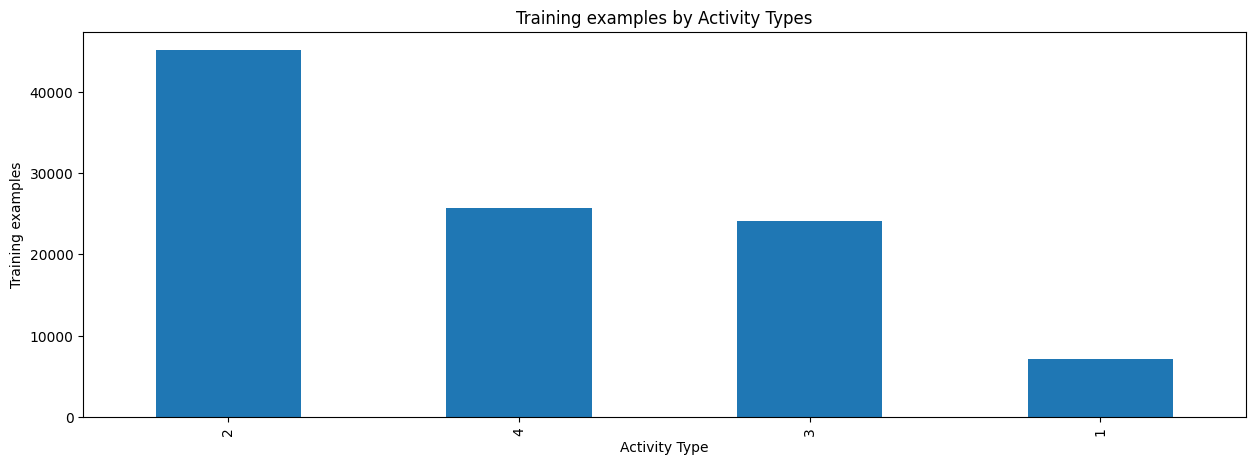

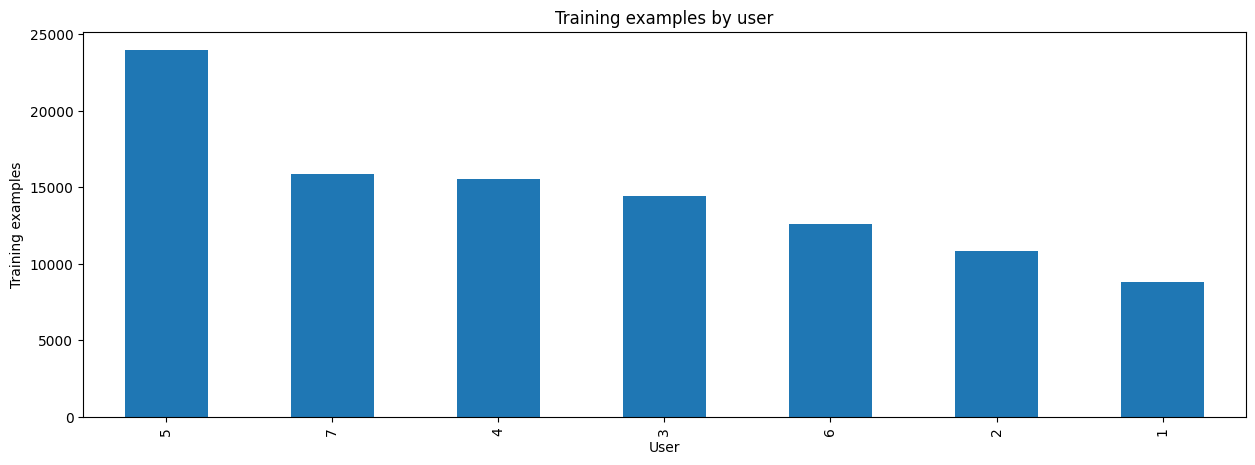

In [ ]:
plt.figure(figsize=(15, 5))

plt.xlabel('Activity Type')
plt.ylabel('Training examples')
df['activity'].value_counts().plot(kind='bar',
                                  title='Training examples by Activity Types')
plt.show()

plt.figure(figsize=(15, 5))
plt.xlabel('User')
plt.ylabel('Training examples')
df['user-id'].value_counts().plot(kind='bar',
                                 title='Training examples by user')
plt.show()

In [ ]:
def axis_plot(ax, x, y, title):
    ax.plot(x, y, 'r')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

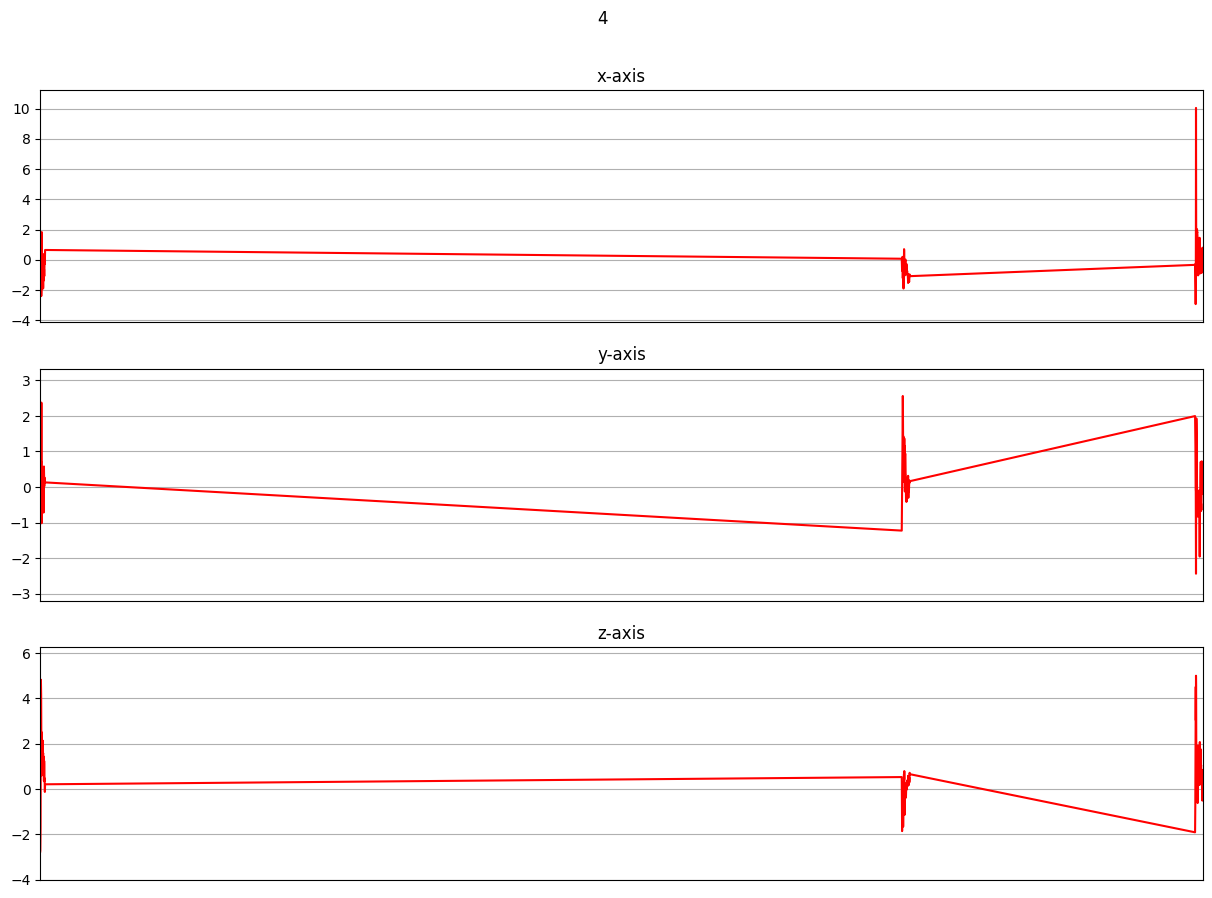

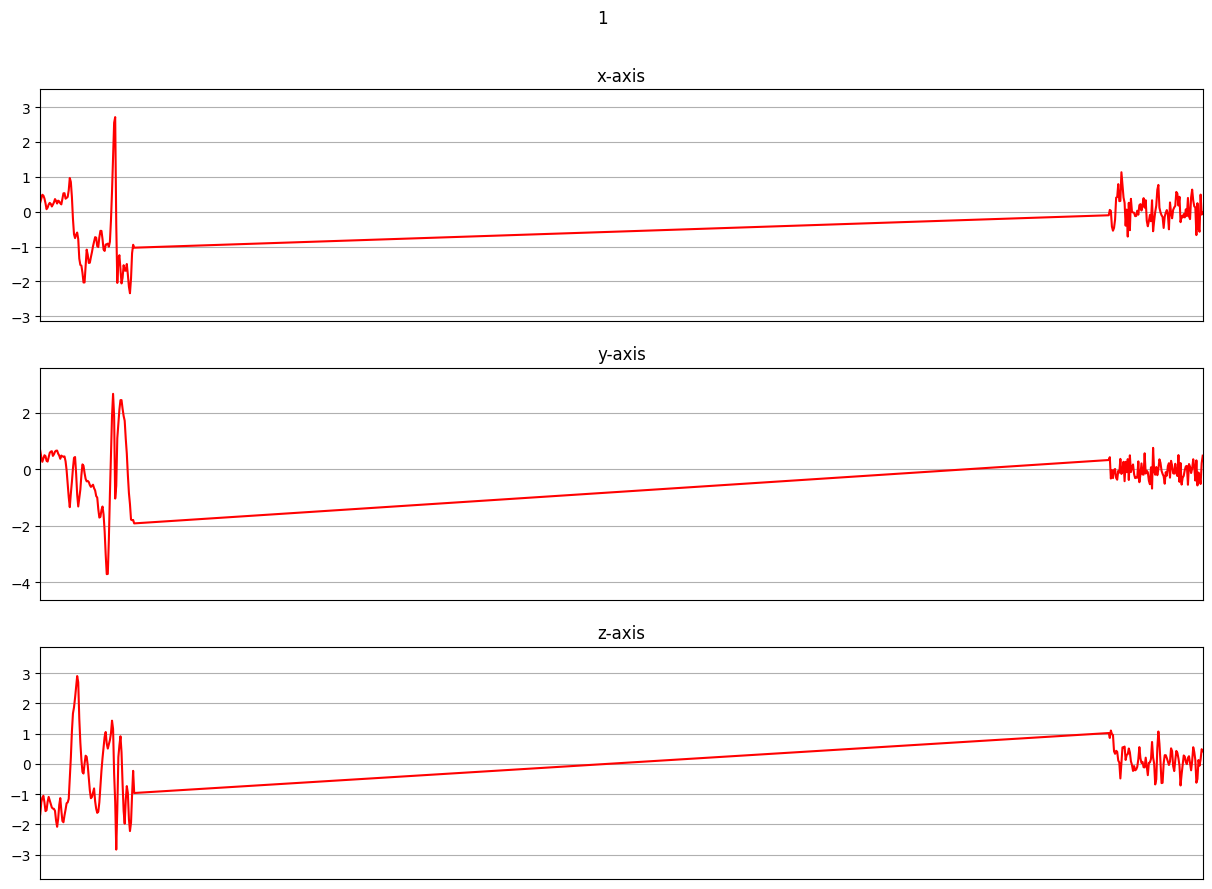

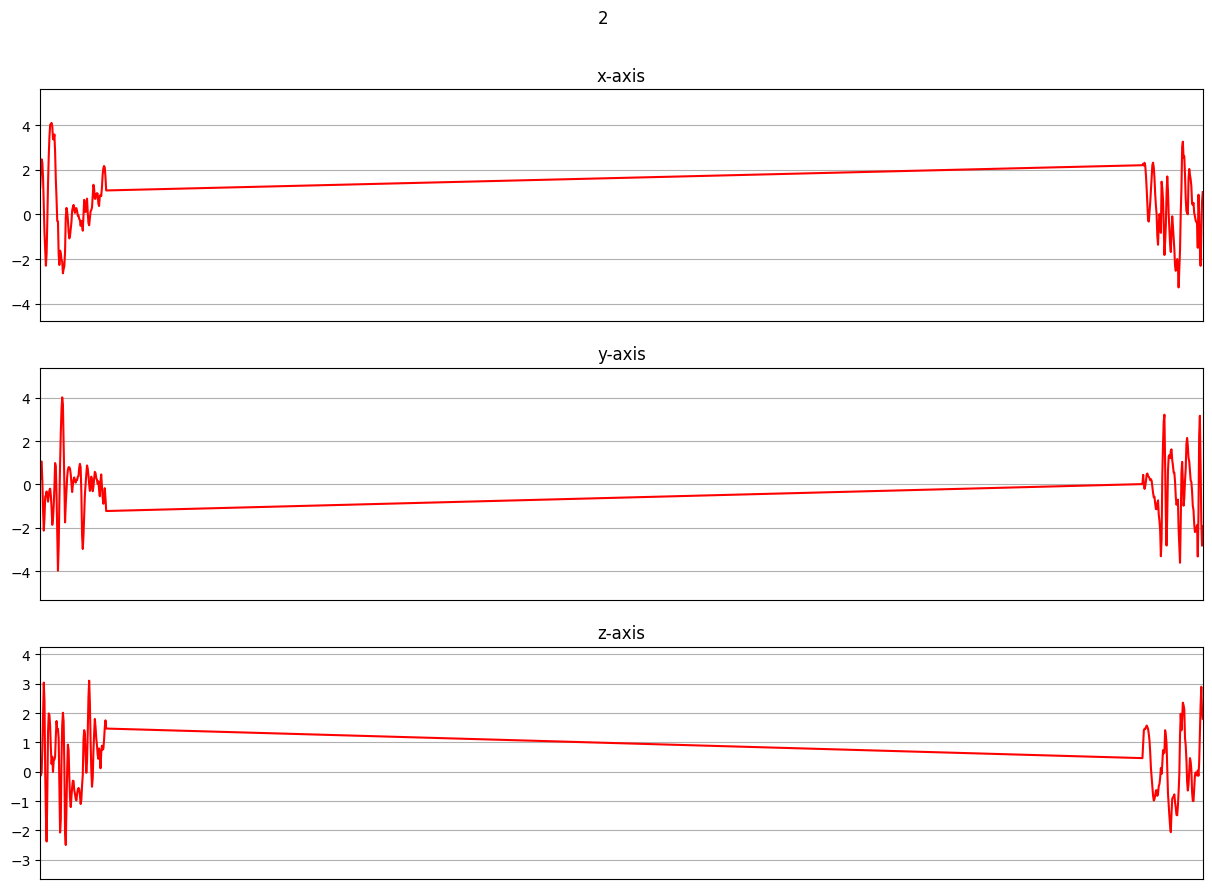

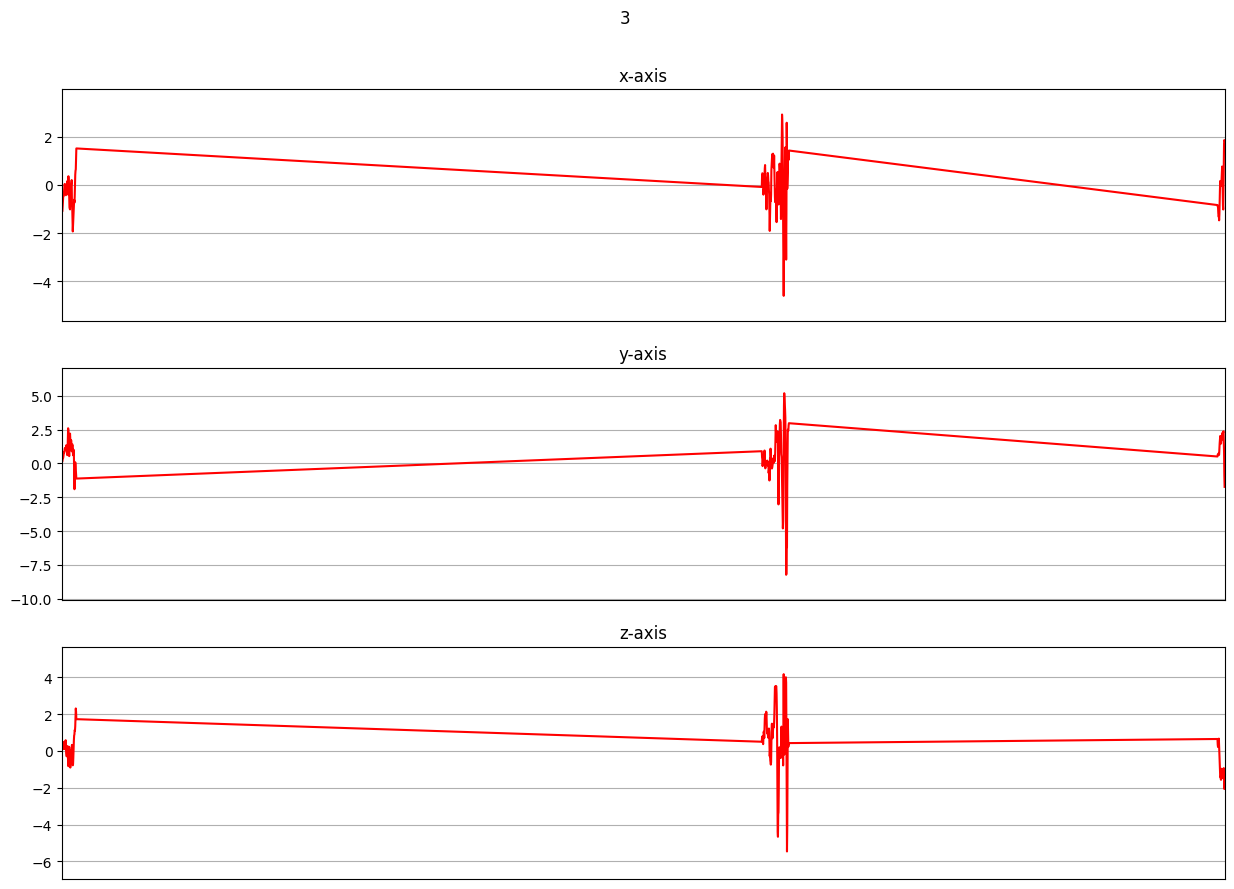

In [ ]:
for activity in df['activity'].unique():
    limit = df[df['activity'] == activity][:180]
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(15, 10))
    axis_plot(ax0, limit['timestamp'], limit['X1'], 'x-axis')
    axis_plot(ax1, limit['timestamp'], limit['Y1'], 'y-axis')
    axis_plot(ax2, limit['timestamp'], limit['Z1'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.9)
    plt.show()

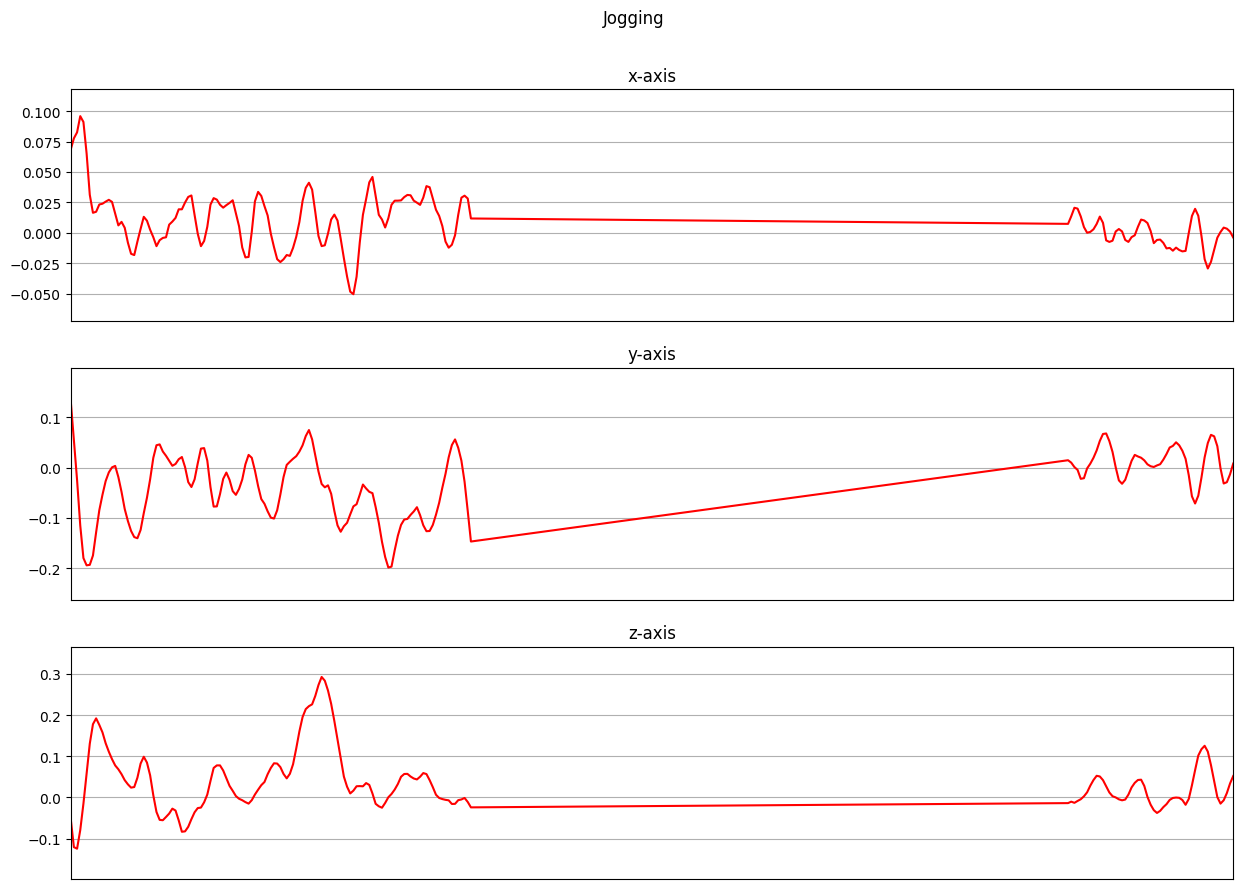

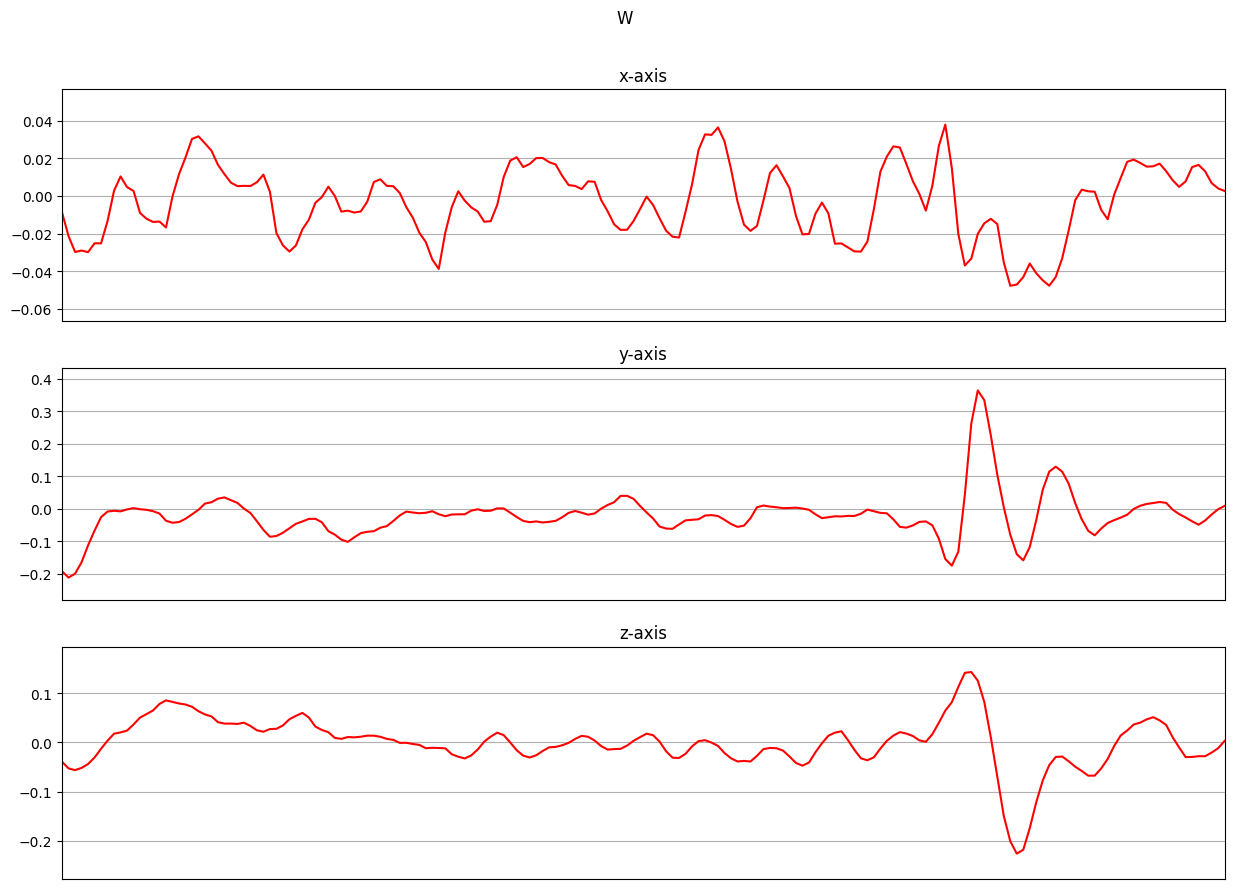

In [ ]:
for activity in df['activity'].unique():
    limit = df[df['activity'] == activity][:180]
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(15, 10))
    axis_plot(ax0, limit['timestamp'], limit['X2'], 'x-axis')
    axis_plot(ax1, limit['timestamp'], limit['Y2'], 'y-axis')
    axis_plot(ax2, limit['timestamp'], limit['Z2'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.9)
    plt.show()

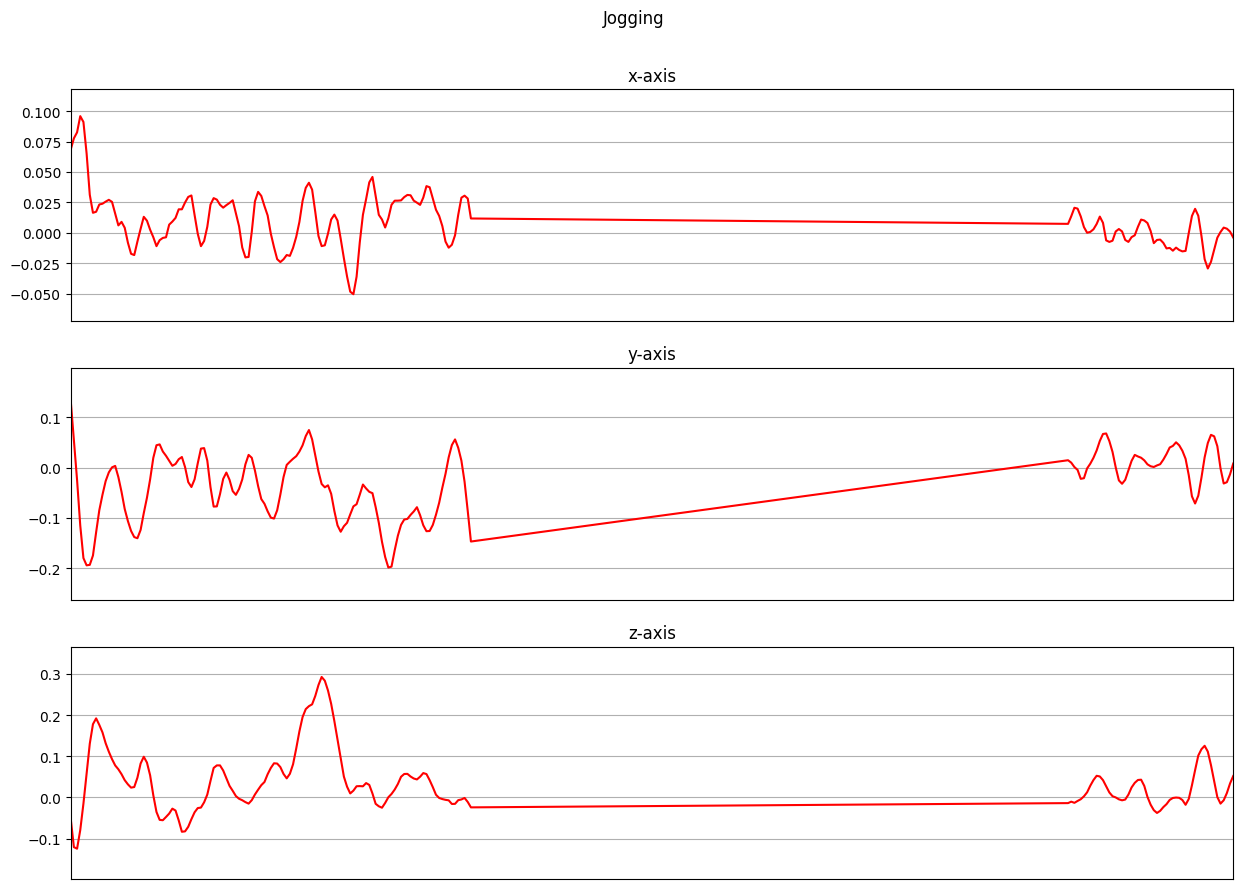

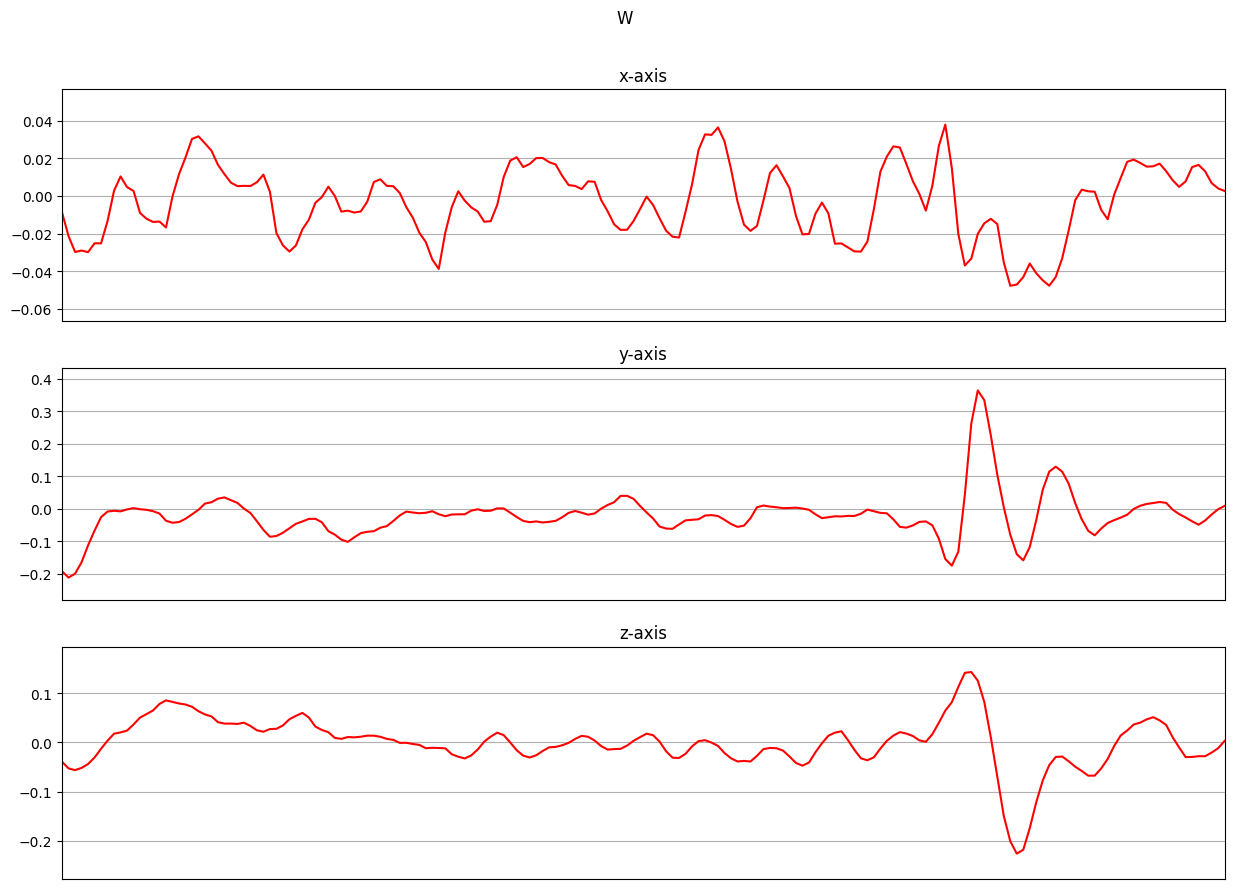

In [ ]:
for activity in df['activity'].unique():
    limit = df[df['activity'] == activity][:180]
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, sharex=True, figsize=(15, 10))
    axis_plot(ax0, limit['timestamp'], limit['X3'], 'x-axis')
    axis_plot(ax1, limit['timestamp'], limit['Y3'], 'y-axis')
    axis_plot(ax2, limit['timestamp'], limit['Z3'], 'z-axis')
    plt.subplots_adjust(hspace=0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.9)
    plt.show()

# Data Preprocessing

Data preprocessing is an essential task, allowing our model to utilize our raw data better. The data preprocessing methods that will be used here are:

Label coding

Linear interpolation

Data segmentation

Normalization

Time series segmentation

Unique Heat Coding

## Label Encoding

Since the model cannot accept non-numeric labels as input, we will add the encoded label for the 'activity' column in another column and name it 'activityEncode '. The labels are converted to numeric labels as shown below (this label is the outcome label we want to predict)

In [ ]:
label_encode = LabelEncoder()
df['activityEncode'] = label_encode.fit_transform(df['activity'].values.ravel())
df

,user-id,activity,timestamp,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,activityEncode
0,1,4,1632794308528270000,0.930462,0.903079,-2.768524,-5.634021,-6.175710,5.127262,-9.958309,-28.945621,30.981628,3
1,1,4,1632794308548230000,1.248476,1.019646,-2.714613,-5.733714,-5.900377,5.336713,-10.297661,-27.918438,32.027771,3
2,1,4,1632794308568190000,1.333154,1.088095,-2.240564,-5.816296,-5.597873,5.568205,-10.939529,-26.924255,32.957764,3
3,1,4,1632794308588140000,0.446156,0.657713,-1.720951,-5.879945,-5.266401,5.819076,-11.042465,-25.916569,34.081421,3
4,1,4,1632794308608100000,-0.381843,0.727549,1.207038,-5.992271,-4.937453,5.990381,-11.422756,-24.578075,35.086365,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101952,5,3,1632819842221160000,-0.134354,0.278885,-0.749987,-4.822841,-6.830767,5.123594,-7.535816,-36.240494,4.530151,2
101953,5,3,1632819842241120000,0.019141,0.138018,-0.625872,-4.819964,-6.817989,5.143282,-7.814285,-36.302902,4.251648,2
101954,5,3,1632819842261080000,-0.005648,-0.085004,-0.650264,-4.830041,-6.799074,5.158845,-8.269833,-36.278534,4.113159,2
101955,5,3,1632819842281040000,-0.086951,-0.237326,-0.771555,-4.842112,-6.779481,5.173296,-8.468685,-36.340630,4.004272,2


## Linear Interpolation

The problem of data loss of NaN during acquisition can be avoided by utilizing linear interpolation. It will fill in the missing values by interpolation. Although there is only one NaN value in this dataset, it needs to be implemented for our presentation.


In [ ]:
df.isna().sum()

user-id           0
activity          0
timestamp         0
X1                0
Y1                0
Z1                0
X2                0
Y2                0
Z2                0
X3                0
Y3                0
Z3                0
activityEncode    0
dtype: int64

In [ ]:
interpolation_fn = interp1d(df['activityEncode'] ,df['Z1'], kind='linear')
interpolation_fn = interp1d(df['activityEncode'] ,df['Z2'], kind='linear')
interpolation_fn = interp1d(df['activityEncode'] ,df['Z3'], kind='linear')
interpolation_fn

In [ ]:
null_list = df[df['Z1'].isnull()].index.tolist()
null_list = df[df['Z2'].isnull()].index.tolist()
null_list = df[df['Z3'].isnull()].index.tolist()
null_list

[]

In [ ]:
for i in null_list:
    y = df['activityEncode'][i]
    value = interpolation_fn(y)
    df['Z1']=df['Z1'].fillna(value)
    df['Z3']=df['Z3'].fillna(value)
    df['Z2']=df['Z2'].fillna(value)
    print(value)

In [ ]:
df.isna().sum()

user-id           0
activity          0
timestamp         0
X1                0
Y1                0
Z1                0
X2                0
Y2                0
Z2                0
X3                0
Y3                0
Z3                0
activityEncode    0
dtype: int64

## Dataset split

Data segmentation is performed based on user IDs to avoid data segmentation errors. We use users with IDs less than or equal to 27 in the training set and the rest in the test set.

In [ ]:
## train split users between 1 and 27, test split users between 28 and 33
df_test = df[df['user-id'] > 30]
df_train = df[df['user-id'] <= 30]

## Normalization

Before training, the data features need to be normalized to a range of 0 to 1. The method we use is:

In [ ]:
df_train['X1'] = (df_train['X1']-df_train['X1'].min())/(df_train['X1'].max()-df_train['X1'].min())
df_train['Y1'] = (df_train['Y1']-df_train['Y1'].min())/(df_train['Y1'].max()-df_train['Y1'].min())
df_train['Z1'] = (df_train['Z1']-df_train['Z1'].min())/(df_train['Z1'].max()-df_train['Z1'].min())
df_train['X2'] = (df_train['X1']-df_train['X1'].min())/(df_train['X1'].max()-df_train['X1'].min())
df_train['Y2'] = (df_train['Y1']-df_train['Y1'].min())/(df_train['Y1'].max()-df_train['Y1'].min())
df_train['Z2'] = (df_train['Z1']-df_train['Z1'].min())/(df_train['Z1'].max()-df_train['Z1'].min())
df_train['X3'] = (df_train['X1']-df_train['X1'].min())/(df_train['X1'].max()-df_train['X1'].min())
df_train['Y3'] = (df_train['Y1']-df_train['Y1'].min())/(df_train['Y1'].max()-df_train['Y1'].min())
df_train['Z3'] = (df_train['Z1']-df_train['Z1'].min())/(df_train['Z1'].max()-df_train['Z1'].min())
df_train

,user-id,activity,timestamp,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,activityEncode
0,1,4,1632794308528270000,0.345550,0.661355,0.475894,0.345550,0.661355,0.475894,0.345550,0.661355,0.475894,3
1,1,4,1632794308548230000,0.350129,0.663634,0.477116,0.350129,0.663634,0.477116,0.350129,0.663634,0.477116,3
2,1,4,1632794308568190000,0.351348,0.664972,0.487859,0.351348,0.664972,0.487859,0.351348,0.664972,0.487859,3
3,1,4,1632794308588140000,0.338577,0.656557,0.499635,0.338577,0.656557,0.499635,0.338577,0.656557,0.499635,3
4,1,4,1632794308608100000,0.326655,0.657922,0.565991,0.326655,0.657922,0.565991,0.326655,0.657922,0.565991,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101952,5,3,1632819842221160000,0.330218,0.649149,0.521639,0.330218,0.649149,0.521639,0.330218,0.649149,0.521639,2
101953,5,3,1632819842241120000,0.332428,0.646395,0.524452,0.332428,0.646395,0.524452,0.332428,0.646395,0.524452,2
101954,5,3,1632819842261080000,0.332071,0.642034,0.523899,0.332071,0.642034,0.523899,0.332071,0.642034,0.523899,2
101955,5,3,1632819842281040000,0.330901,0.639055,0.521151,0.330901,0.639055,0.521151,0.330901,0.639055,0.521151,2


In [ ]:
df_train['activityEncode'].value_counts()

0    202
1    187
Name: activityEncode, dtype: int64

## Segmentation
time series segmentation

Since we're dealing with time-series data, we need to create a function for segmentation, labeling the names and ranges of each record for segmentation. This function performs the separation of features in x_train and y_train, splitting every 80 time periods into one dataset.

In [ ]:
def segments(df, time_steps, step, label_name):
    N_FEATURES = 9
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['X1'].values[i:i+time_steps]
        ys = df['Y1'].values[i:i+time_steps]
        zs = df['Z1'].values[i:i+time_steps]
        xs2 = df['X2'].values[i:i+time_steps]
        ys2 = df['Y2'].values[i:i+time_steps]
        zs2 = df['Z2'].values[i:i+time_steps]
        xs3 = df['X3'].values[i:i+time_steps]
        ys3 = df['Y3'].values[i:i+time_steps]
        zs3 = df['Z3'].values[i:i+time_steps]
        label = mode(df[label_name][i:i+time_steps])[0][0]
        label2 = mode(df[label_name][i:i+time_steps])[0][0]
        label3 = mode(df[label_name][i:i+time_steps])[0][0]
        segments.append([xs, ys, zs,xs2,ys2,zs2,xs3,ys3,zs3])
        labels.append(label)

    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

In [ ]:
TIME_PERIOD = 40
STEP_DISTANCE = 40
LABEL = 'activityEncode'
x_train, y_train = segments(df_train, TIME_PERIOD, STEP_DISTANCE, LABEL)
print('x_train shape:', x_train.shape)
print('Training samples:', x_train.shape[0])
print('y_train shape:', y_train.shape)
print(y_train)

x_train shape: (2548, 40, 9)
Training samples: 2548
y_train shape: (2548,)
[3 3 3 ... 2 2 2]


Some of the data that will be used later is also stored here: time_period, number of sensors, and num_classes.

In [ ]:
def segments2(df, time_steps, step, label_name):
    N_FEATURES = 3
    segments = []
    labels = []
    for i in range(0, len(df) - time_steps, step):
        xs = df['X1'].values[i:i+time_steps]
        ys = df['Y1'].values[i:i+time_steps]
        zs = df['Z1'].values[i:i+time_steps]
        label = mode(df[label_name][i:i+time_steps])[0][0]

        segments.append([xs, ys, zs])
        labels.append(label)

    reshaped_segments = np.asarray(segments, dtype=np.float32).reshape(-1, time_steps, N_FEATURES)
    labels = np.asarray(labels)

    return reshaped_segments, labels

## Data reshaping

Finally, it needs to be converted to a list using Reshape as input for Keras:

In [ ]:
print('x_train shape:', x_train.shape)
print('Training samples:', x_train.shape[0])
print('y_train shape:', y_train.shape)


x_train shape: (2548, 40, 9)
Training samples: 2548
y_train shape: (2548,)


In [ ]:
## Input and Output Dimensions
time_period, sensors = x_train.shape[1], x_train.shape[2]
num_classes = label_encode.classes_.size
print(list(label_encode.classes_))

[1, 2, 3, 4]


In [ ]:
## reshaping data
input_shape = time_period * sensors
x_train = x_train.reshape(x_train.shape[0], input_shape)
print("Input Shape: ", input_shape)
print("Input Data Shape: ", x_train.shape)

Input Shape:  360
Input Data Shape:  (2548, 360)


Finally, all the data needs to be converted to float32.

In [ ]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

## One-Hot Encoding

This is the final step of data preprocessing, which we will perform by coding the labels and storing them in y_train_hot.

In [ ]:
y_train_hot = to_categorical(y_train, num_classes)
print("y_train shape: ", y_train_hot.shape)

y_train shape:  (2548, 4)


# Model
The model we use is a sequence model consisting of 8 layers. The first two layers of the model consist of LSTMs, each with 32 neurons, using an activation function of Relu. Then, a convolutional layer is used for extracting spatial features.

At the junction of the two layers, it is necessary to change the LSTM output dimension since the output has three dimensions (number of samples, time step, input dimension). In contrast, the CNN requires a 4-dimensional input (number of samples, 1, time step, input).

The first CNN layer has 64 neurons, and the other has 128 neurons. We have a maximal pooling layer between the first and second CNN layers to perform downsampling operations. Then, there is a Global Average Pool (GAP) layer to convert the multi-D feature mapping into 1-D feature vectors, which reduces the global model parameters since no parameters are needed in this layer. Then, there is the BN layer, which helps in the convergence of the model.

The last layer is the output layer of the model, which is simply a fully connected layer with the six neurons of the SoftMax classifier layer that represents the probability of the current class.

In [ ]:
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(input_shape,1), activation='relu'))
model.add(LSTM(32,return_sequences=True, activation='relu'))
model.add(Reshape((1, 360, 32)))
model.add(Conv1D(filters=64,kernel_size=2, activation='relu', strides=2))
model.add(Reshape((180, 64)))
model.add(MaxPool1D(pool_size=4, padding='same'))
model.add(Conv1D(filters=192, kernel_size=2, activation='relu', strides=1))
model.add(Reshape((44, 192)))
model.add(GlobalAveragePooling1D())
model.add(BatchNormalization(epsilon=1e-06))
model.add(Dense(4))
model.add(Activation('softmax'))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 360, 32)           4352      
                                                                 
 lstm_3 (LSTM)               (None, 360, 32)           8320      
                                                                 
 reshape_3 (Reshape)         (None, 1, 360, 32)        0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 180, 64)        4160      
                                                                 
 reshape_4 (Reshape)         (None, 180, 64)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 45, 64)           0         
 1D)                                                             
                                                      

## Training

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,
                    y_train_hot,
                    batch_size=192,
                    epochs=50
                   )

Epoch 1/50
12/14 [========================>.....] - ETA: 1s - loss: 1.3369 - accuracy: 0.4102

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

y_pred_train = model.predict(x_train)
max_y_pred_train = np.argmax(y_pred_train, axis=1)
print(classification_report(y_train, max_y_pred_train))

## Test

### Normalize test data

In [ ]:
df_test['X1'] = (df_test['X1']-df_test['X1'].min())/(df_test['X1'].max()-df_test['X1'].min())
df_test['Y1'] = (df_test['Y1']-df_test['Y1'].min())/(df_test['Y1'].max()-df_test['Y1'].min())
df_test['Z1'] = (df_test['Z1']-df_test['Z1'].min())/(df_test['Z1'].max()-df_test['Z1'].min())
df_test['X2'] = (df_test['X2']-df_test['X2'].min())/(df_test['X2'].max()-df_test['X2'].min())
df_test['Y2'] = (df_test['Y2']-df_test['Y2'].min())/(df_test['Y2'].max()-df_test['Y2'].min())
df_test['Z2'] = (df_test['Z2']-df_test['Z2'].min())/(df_test['Z2'].max()-df_test['Z2'].min())
df_test['X3'] = (df_test['X3']-df_test['X3'].min())/(df_test['X3'].max()-df_test['X3'].min())
df_test['Y3'] = (df_test['Y3']-df_test['Y3'].min())/(df_test['Y3'].max()-df_test['Y3'].min())
df_test['Z3'] = (df_test['Z3']-df_test['Z3'].min())/(df_test['Z3'].max()-df_test['Z3'].min())
df_test

,user-id,activity,timestamp,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,activityEncode
0,33,Jogging,1.676523,0.633651,0.245509,0.409864,0.725339,0.666639,0.495287,0.725339,0.666639,0.495287,0
1,33,Jogging,2.676523,0.567944,0.230657,0.405948,0.735166,0.640756,0.488313,0.735166,0.640756,0.488313,0
2,33,Jogging,3.676523,0.534111,0.244610,0.420652,0.740375,0.615254,0.487925,0.740375,0.615254,0.487925,0
3,33,Jogging,4.676523,0.531880,0.262969,0.427319,0.754450,0.585965,0.492474,0.754450,0.585965,0.492474,0
4,33,Jogging,5.676523,0.531059,0.269201,0.440353,0.749385,0.564908,0.498939,0.749385,0.564908,0.498939,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,34,Jogging,805.676523,0.653639,0.224662,0.473069,0.620235,0.674230,0.516824,0.620235,0.674230,0.516824,0
805,34,Jogging,806.676523,0.670469,0.219055,0.462996,0.613585,0.676086,0.513147,0.613585,0.676086,0.513147,0
806,34,Jogging,807.676523,0.682613,0.212919,0.459658,0.610040,0.670524,0.509670,0.610040,0.670524,0.509670,0
807,34,Jogging,808.676523,0.685388,0.201808,0.459156,0.604806,0.656344,0.505274,0.604806,0.656344,0.505274,0


### Segmentation & Reshaping

In [ ]:
x_test, y_test = segments2(df_test,
                         TIME_PERIOD,
                         STEP_DISTANCE,
                         LABEL)

x_test = x_test.reshape(x_test.shape[0], input_shape)
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
y_test = to_categorical(y_test, num_classes)

### Evaluate

In [ ]:
score = model.evaluate(x_test, y_test)
print("Accuracy:", score[1])
print("Loss:", score[0])

1/1 [==============================] - 1s 551ms/step - loss: 0.5056 - accuracy: 1.0000
Accuracy: 1.0
Loss: 0.5056101679801941


1/1 [==============================] - 0s 42ms/step


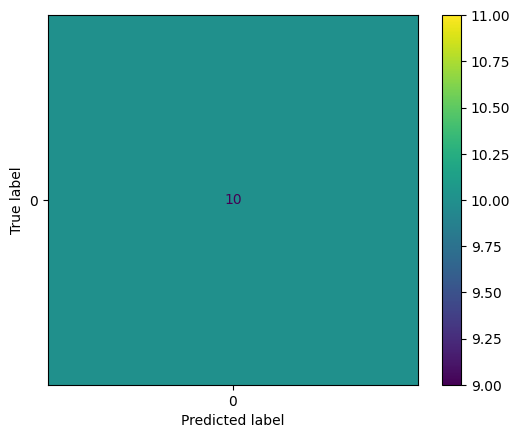

In [ ]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
y_test_pred = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_pred, predictions)
cm_disp = ConfusionMatrixDisplay(confusion_matrix= cm)
cm_disp.plot()
plt.show()

In [ ]:
print(classification_report(y_test_pred, predictions))